# 텐서플로우 기초

## 1. 텐서플로우 기본다지기

텐서플로우를 생전 처음 접해본다면 본격적으로 들어가기 전에 다음을 명심해두자.

텐서플로우는 미리 **설계**한 뒤, 설계가 끝나면 **실행**을 하는 구조이다.

보통의 프로그래밍언어에서는 변수를 만들고 바로바로 값을 대입하는 것이 흔하지만, 텐서플로우는 그렇지 않다.

다소 헷갈릴 수 있으니, 생초심자라면 잘 새겨두고 다음의 글을 보길 바란다.

**텐서플로우**란? 데이터 플로우 그래프(data flow graph)를 사용하여 수치 연산을 하는 라이브러리
- **node** : 수학적 연산
- **edge** : 다차원 데이터 배열(array)
- **tensor** : 동적인 사이즈를 가지는 다차원 데이터 배열

In [1]:
import tensorflow as tf

In [3]:
a = tf.placeholder('float') # float 자료형을 담는 그릇
b = tf.placeholder('float')

y = tf.multiply(a, b)

sess = tf.Session() 

print(sess.run(y, feed_dict = {a:3.0, b:3.0}))

9.0


- 프로그램 실행 중에, 값을 변경할 수 있는 placeholder라는 심볼릭 변수(a, b)를 정의
- 곱셈함수(y)를 호출할 때, feed_dict를 통해 a와 b에 값을 넣어주어 이 두 변수를 parameter로 넘긴다.

### 다양한 수학 연산 함수
tf.add() # 덧셈

tf.subtract() # 뺄셈

tf.truediv() # 나눗셈의 몫

tf.mod() # 나눗셈의 나머지

tf.abs() # 절대값

tf.square() # 제곱

tf.sqrt() # 제곱근(루트)

tf.log() # 로그값

tf.diag() # 대각행렬

tf.transpose # Transpose

tf.matmul # 행렬곱

Session()함수를 통해 세션을 생성함으로서 프로그램이 작동한다. 

즉, 세션을 생성하여 run()메소드를 호출할 때, 심볼릭 코드가 실제 실행된다.

이렇게 전체적인 텐서플로우의 구조는 전체 알고리즘을 먼저 기술하고, 세션을 통하여 연산을 실행하는 구조이다.

만약, 코드의 일부분만 계산을 수행하면서 그래프 구조를 만들어가고 싶을 때는 tf.interactive()를 사용한다.

위의 코드에서와 같이 a,b변수와 y함수는 그래프 구조안에 저장이 된다. 즉, 그래프 노드에 저장이 된다.

노드(node)는 수학 연산을 나타내고 데이터 input과 output의 위치를 나타내며, 저장된 변수를 읽거나 사용한다.

엣지(edge)는 input과 output 사이의 관계를 표현하고, 각 노드에서 다른 노드로 텐서(tensor)(자료구조)를 운반한다.

## 2. 텐서플로우 선형회귀분석(Regression)

In [2]:
import numpy as np

num_points = 100
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1,y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

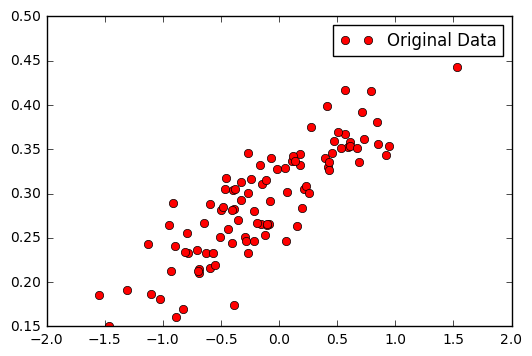

In [3]:
import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro', label = 'Original Data')
plt.legend()
plt.show()

y = 0.1 * x + 0.3의 관계를 가지는 데이터를 생성했다. 하지만 정규분포를 따라 약간의 편차를 두어, 완전한 직선에 일치하지는 않는 데이터를 생성했다.

다음은 입력데이터 x_data로부터 출력값 y_data를 예측할 수 있는 알고리즘을 훈련시켜야 한다. y_data = W * x_data + b라는 선형회귀모델을 W는 0.1로, b는 0.3에 근사할 수 있도록 학습을 시켜야 한다. 

이런 문제를 풀 때에는 W와 b의 초기값을 지정해두고, 데이터 셋을 반복하여 적용하면서 점점 더 정확한 결과를 얻기 위해 W와 b parameter를 수정해야 한다. 즉, 반복을 하면서 y_data = W * x_data + b라는 선형회귀모델을 개선시키는 것과 같다. 반복을 통해 모델이 개선되고 있는지를 확인하기 위해, 얼마나 모델이 좋은(정확한) 모델인지 아닌지를 측정하는 cost function을 정의할 것이다. 이 예제에서는 평균제곱오차(Mean Square Error, MSE)를 사용한다.

In [4]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # tf.random_uniform에서 보듯이, 자료(tensor)의 형태(shape)를 반드시 지정해줘야 한다
b = tf.Variable(tf.zeros([1])) # shape = [1]
y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

좋은 모델은, 위에서 계산한 loss가 작은 모델이다. 우리가 loss를 최소화하면 데이터에 가장 최적인 모델을 얻을 수 있다. 이렇게 loss를(error)를 최소화하는 역할을 하는 알고리즘이 Gradient Descent가 하는 역할이다. Gradient Descent에 대해 간략하게 설명하면, 일련의 paramter로 구성된 함수가 주어지면 초기 시작점에서 함수의 값이 최소화 되는 방향으로 paramter들을 변경하는 것을 반복적으로 수행하는 알고리즘이다.

In [5]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5) # paramter를 변경하는, 즉 모델을 최적화시키는 함수
train = optimizer.minimize(loss) # paramter를 변경하는(optimizer 함수)의 기준을 minimize loss로 하는 함수

지금까지 전체 알고리즘을 구성하였고, 이제 세션을 작성하여 실행 모듈이 알고리즘을 실행할 차례이다. Chapter 1에서와 같이 session을 생성하고, run 메소드를 호출해야 한다. 추가적으로, 변수(W,b)를 생성하였으므로, 아래와 같이 초기화하는 과정을 거쳐야 한다.

In [9]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

이제 입력 데이터에 최적화 된 선형회귀식의 W와 b에 도달하기 위해 반복 학습을 실행해야 한다. 이 예제에서는 15번의 반복학습을 실행하겠다. loss가 점점 감소하는 것을 확인할 수 있다.

step: 0 w: [-0.03834479] b: [ 0.28768435] loss: 0.00753582


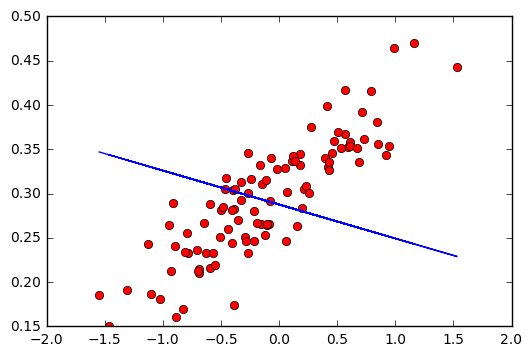

step: 3 w: [ 0.05985218] b: [ 0.29953578] loss: 0.00149616


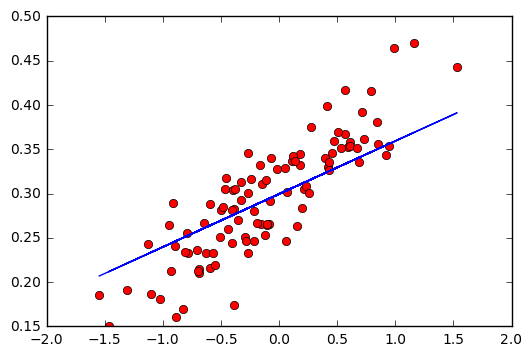

step: 6 w: [ 0.08490083] b: [ 0.30397087] loss: 0.00109746


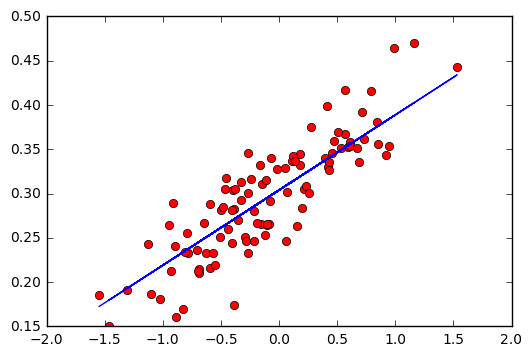

step: 9 w: [ 0.09135283] b: [ 0.30511326] loss: 0.00107101


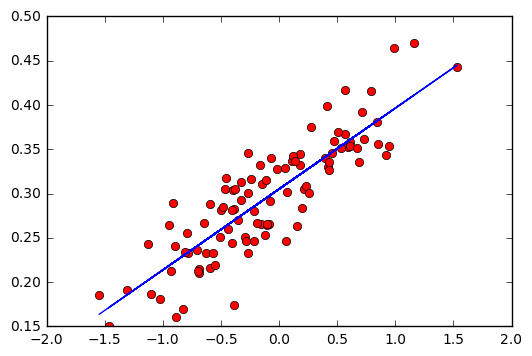

step: 12 w: [ 0.09301472] b: [ 0.30540749] loss: 0.00106925


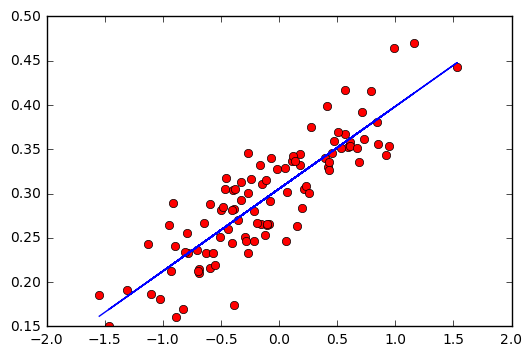

In [10]:
for step in range(15):
    sess.run(train)
    
    if step%3==0:
        print("step:",step, "w:",sess.run(W), "b:",sess.run(b), "loss:", sess.run(loss)) # sess.run(W) 형식으로 취해야 우리가 원하는 결과가 출력된다.
    
    # Graphic display
        plt.plot(x_data, y_data, 'ro')
        plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
        plt.show()
    
sess.close()

## 3. 텐서플로우 텐서란?

텐서는 동적인 사이즈를 가지는 다차원 데이터 배열을 말한다. 데이터의 타입에는 int, float, string, boolean 등 다양한 타입을 가질 수 있다.

텐서는 차원을 나타내는 rank를 가진다. 다음과 같은 텐서는 2 rank를 가진다.

In [63]:
sess = tf.Session()

In [62]:
t = [[1,2,3], [4,5,6], [7,8,9]]

쉽게 생각하면 가장 바깥쪽의 대괄호([])의 개수를 rank라고 할 수 있다. 

헷갈리지 말아야 할 것은 텐서의 rank는 matrix의 rank와 다르다는 것이다.

예시를 들어 설명해보자면

t = [ [1,2,3], [4,5,6] ] 

tf.rank = 2

matrix는 3차원이지만 텐서 t는 2차원이다.

rank가 0인 텐서는 스칼라(scalar), 1인 텐서는 벡터(vector), 2인 텐서는 행렬(matrix) 값이 된다. 

공식적으로는 텐서의 차원을 표현하기 위해서 구조(shape), 랭크, 차원번호(dimension number) 3가지 종류의 이름을 사용한다. 

위의 텐서는 구조 형태로는 [D0, D1], 2 rank, 차원번호로는 2_D로 표현된다. 

텐서를 다루기 위해서는 아래와 같은 일련의 변환함수를 이용한다.

tf.shape() # 텐서의 구조를 알아낸다.

tf.size() # 텐서의 크기를 알아낸다.

tf.rank() # 텐서의 rank를 알아낸다.

tf.reshape() # 텐서의 element는 유지하면서, 텐서의 구조를 바꾼다.

tf.expand_dims() # 텐서에 차원을 추가한다.

tf.slice() # 텐서의 일부분을 삭제한다.

tf.split() # 텐서를 여러개의 텐서로 나눈다.

tf.concat() # 텐서를 이어 붙인다.

In [73]:
t2 = [[1,2], [4,5], [6,7], [8,9]]

In [74]:
sess.run(tf.shape(t2))

array([4, 2])

In [76]:
sess.run(tf.size(t2))

8

In [77]:
sess.run(tf.rank(t2)) 

2

In [87]:
sess.run(tf.reshape(t2, [2,4])) # 2행 4열 짜리 행렬로 바꾸겠다.

array([[1, 2, 4, 5],
       [6, 7, 8, 9]])

-1을 행이나 열 값으로 주면 텐서플로우 알아서 처리하라는 뜻이다.

In [80]:
sess.run(tf.reshape(t2, [-1,2])) # 2열짜리만 만들어주고 행은 맘대로 해라.

array([[1, 2],
       [4, 5],
       [6, 7],
       [8, 9]])

In [81]:
sess.run(tf.reshape(t2, [2,-1])) # 2행짜리만 만들어주고 열은 맘대로 해라.

array([[1, 2, 4, 5],
       [6, 7, 8, 9]])

In [86]:
sess.run(tf.expand_dims(t2, 1))  # input 옆의 값은 axis이다. 

array([[[1, 2]],

       [[4, 5]],

       [[6, 7]],

       [[8, 9]]])

In [110]:
vectors = tf.constant(1, dtype = 'float', shape = [2, 2000])
extended_vectors = tf.expand_dims(vectors, axis = 0)

In [113]:
print(sess.run(tf.shape(vectors)))
print(vectors.get_shape())

[   2 2000]
(2, 2000)


In [114]:
print(sess.run(tf.shape(extended_vectors)))
print(extended_vectors.get_shape())

[   1    2 2000]
(1, 2, 2000)


차원이 확장된 것을 확인할 수 있다.

모델링의 시작은 상수나 변수를 지정해주는 것이다. 텐서플로우에서는 여러가지 도구들을 활용하여 상수 및 변수를 생성할 수 있도록 도와준다.

### axis?

axis는 축의 index이다.

만약 다음과 같은 tensor가 있다고 쳐보자.

[ [ [1,2], [3,4] ], 

[ [5,6], [7,8] ] ]

위의 tensor는 rank가 3인 tensor이므로(대괄호 갯수가 3개), 총 3개의 axis를 갖는다.

axis는 0부터 시작한다.

axis 값이 커질수록 깊게 들어간다고 생각하면 된다.

위의 예제에서 구체적으로 살펴보면

1.axis=0

[ [1,2], [3,4] ],[ [5,6], [7,8] ]

2.axis=1

[1,2], [3,4] / [5,6], [7, 8]

3.axis=2

1, 2 / 3, 4 / 5, 6 / 7, 8

In [89]:
sess.run(tf.slice(t2, [1,0], [2,1])) 

array([[4],
       [6]])

\*2차원일 경우\*

tf.slice(input, [input의 몇 행에서 가져올까?, input의 몇 열에서 가져올까?], [slice된 게 이만큼의 행이면 좋겠어, slice된 게 이만큼의 열이면 좋겠어])

그래서 예시는 인풋의 1행 0열의 데이터를 2행 1열로 슬라이스 한 것이다.

3차원도 알고 싶다면 다음의 링크를 참고하자.

http://blog.naver.com/PostView.nhn?blogId=wjddudwo209&logNo=220976695912&categoryNo=75&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=search

In [104]:
t2

[[1, 2], [4, 5], [6, 7], [8, 9]]

In [99]:
s1, s2 = tf.split(t2, 2, 0) 

In [100]:
sess.run(s1)

array([[1, 2],
       [4, 5]])

In [101]:
sess.run(s2)

array([[6, 7],
       [8, 9]])

tf.split(input, 스플릿 할 갯수, axis)

위의 예제를 보자면 t2를 2개로 나눌건데 axis=0을 기준으로 하겠다는 것이다.

In [105]:
t3 = [[1, 2, 3], [4, 5, 6]]
t4 = [[7, 8, 9], [10, 11, 12]]

In [106]:
sess.run(tf.concat([t3, t4], 0))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [107]:
sess.run(tf.concat([t3, t4], 1))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

tf.concat([input1, input2], axis)

tensor들의 dimention은 반드시 맞아야한다.

즉, 짝을 지어줄 수 있어야 한다.

만약 그렇지 않다면...

In [108]:
t5 = [[13 ,14 ,15]]

In [109]:
sess.run(tf.concat([t4, t5], 1)) #value error가 난다.

ValueError: Dimension 0 in both shapes must be equal, but are 2 and 1 for 'concat_2' (op: 'ConcatV2') with input shapes: [2,3], [1,3], [] and with computed input tensors: input[2] = <1>.

## 그 외의 manipulation

tf.zeros_like # 모든 element를 0으로 초기화 한 텐서를 생성한다.

tf.ones_like # 모든 element를 1으로 초기화 한 텐서를 생성한다.

tf.fill # 주어진 스칼라(scalar)값으로 element를 초기화 한 텐서를 생성한다.

tf.constant # 함수 인자로 지정된 값을 이용하여 상수 텐서를 생성한다.

tf.random_normal # 정규 분포 형태를 갖는 난수 텐서를 생성한다.

tf.truncated_normal # 2sigma 범위 밖을 제거한 정규 분포 형태를 갖는 난수 텐서를 생성한다.

tf.random_uniform # uniform 분포 형태의 난수 텐서를 생성한다.

In [116]:
variable = tf.Variable(tf.random_normal([100, 2]))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(variable[0:5]))

[[-0.37781754 -0.25980261]
 [-0.229173   -1.76043069]
 [ 0.88762176  0.1735965 ]
 [ 0.06236109 -1.10103202]
 [-0.69037527  1.35164118]]


혹은 프로그램 실행 중에 데이터를 변경하기 위해서 심볼릭 변수 placeholder를 사용할 수 있다. 

placeholder() 함수는 element의 타입과 텐서의 크기, 이름을 parameter로 받는다. 

placeholder를 사용하는 경우, sess.run()이 호출될 때 feed_dict = {}를 통해서 텐서에 값을 전달해야 한다.

In [117]:
x = tf.placeholder('float')
y = tf.placeholder('float')

mod = tf.mod(x, y)

sess = tf.Session()
print(sess.run(mod, feed_dict={x : 100, y : 3}))

1.0


## Reference

- https://tensorflow.blog/1-%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-%EA%B8%B0%EB%B3%B8%EB%8B%A4%EC%A7%80%EA%B8%B0-first-contact-with-tensorflow/
- https://www.tensorflow.org/ 